# Training models

## Linear Regression learning:

In [5]:
%matplotlib inline

In [3]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

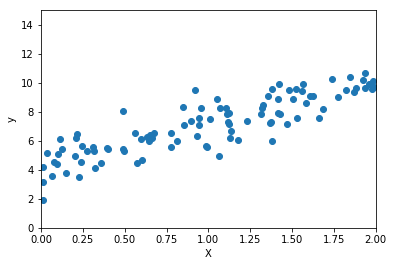

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.xlim((0,2))
plt.ylim((0,15))
plt.show()

In [9]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.23769003],
       [2.90238404]])

In [10]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.23769003],
       [10.04245811]])

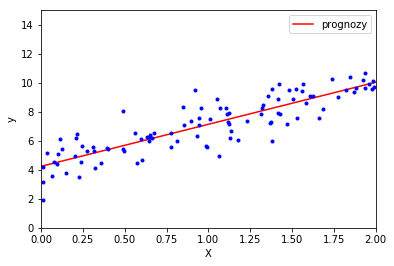

In [13]:
plt.plot(X_new, y_predict, "r-", label= "prognozy")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
print(reg.intercept_)
print(reg.coef_)
print(reg.predict(X_new))

[4.23769003]
[[2.90238404]]
[[ 4.23769003]
 [10.04245811]]


## Gradient descent


In [15]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [16]:
theta

array([[4.23769003],
       [2.90238404]])

In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

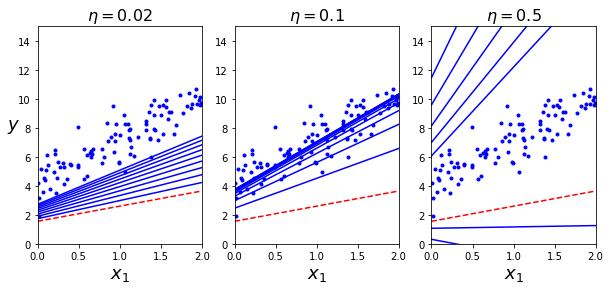

In [19]:
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show() 

In [20]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hiperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m +1)
        theta = theta - eta * gradients

In [21]:
theta

array([[4.26452051],
       [2.90260134]])

In [23]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\Users\apasi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [25]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.22857555]
[2.88748537]
